# Decision/ Regression Tree

Decision Trees are versatile Machine Learning algorithms that can per‐ form both classification and regression tasks, and even multioutput tasks. They are very powerful algorithms, capable of fitting complex datasets.

### Decision Trees
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.


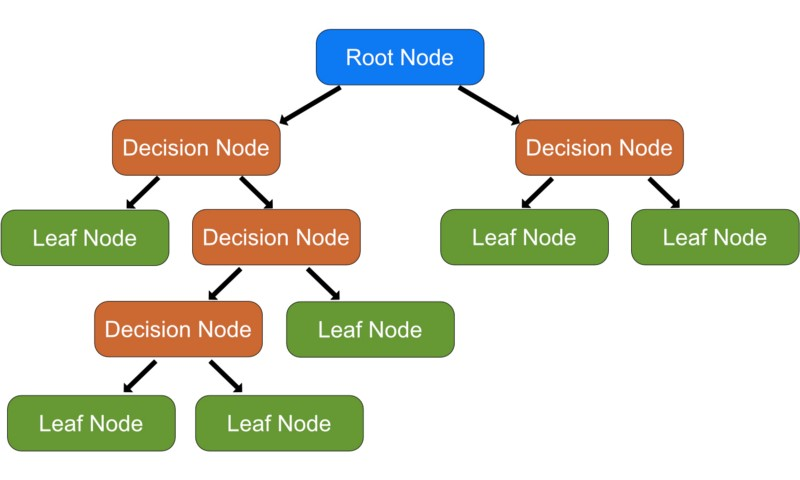


Root node — node at the top of the tree. This node acts as the input node for feature vectors in the model.

Decision nodes — nodes where the variables are evaluated. These nodes have arrows pointing to them and away from them

Leaf nodes — final nodes at which the prediction is made

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 

In [24]:
data = pd.read_csv('FEV.csv') 

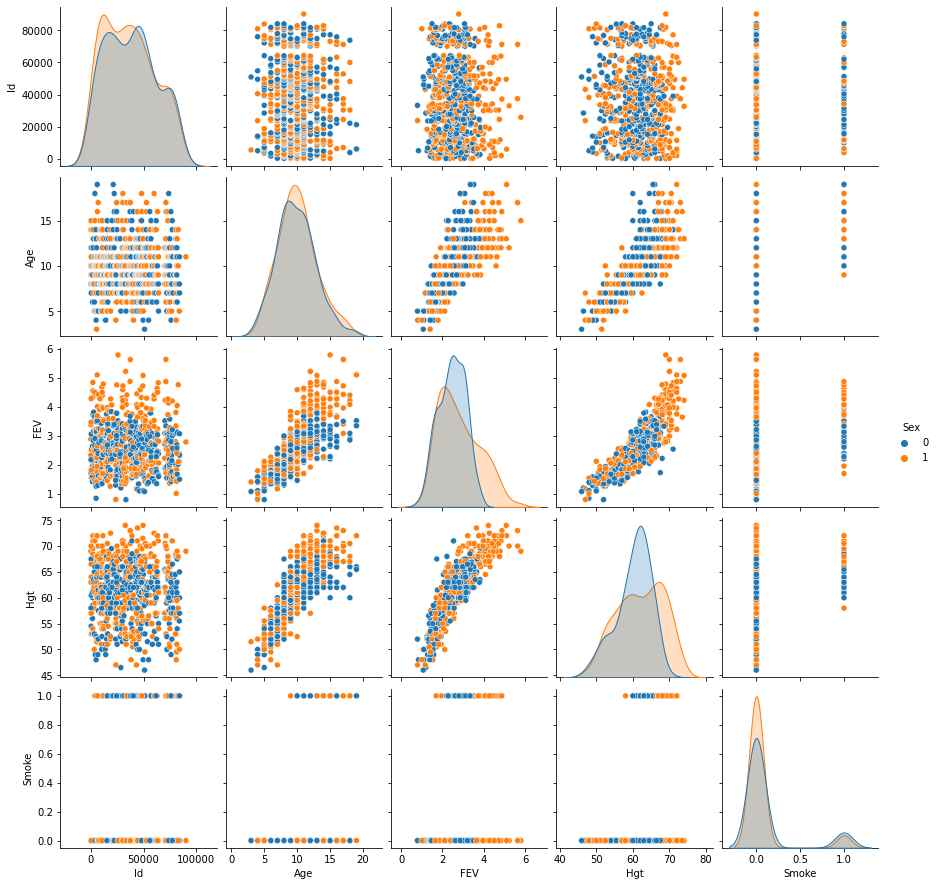

In [26]:
sns.pairplot(data, hue='Sex')

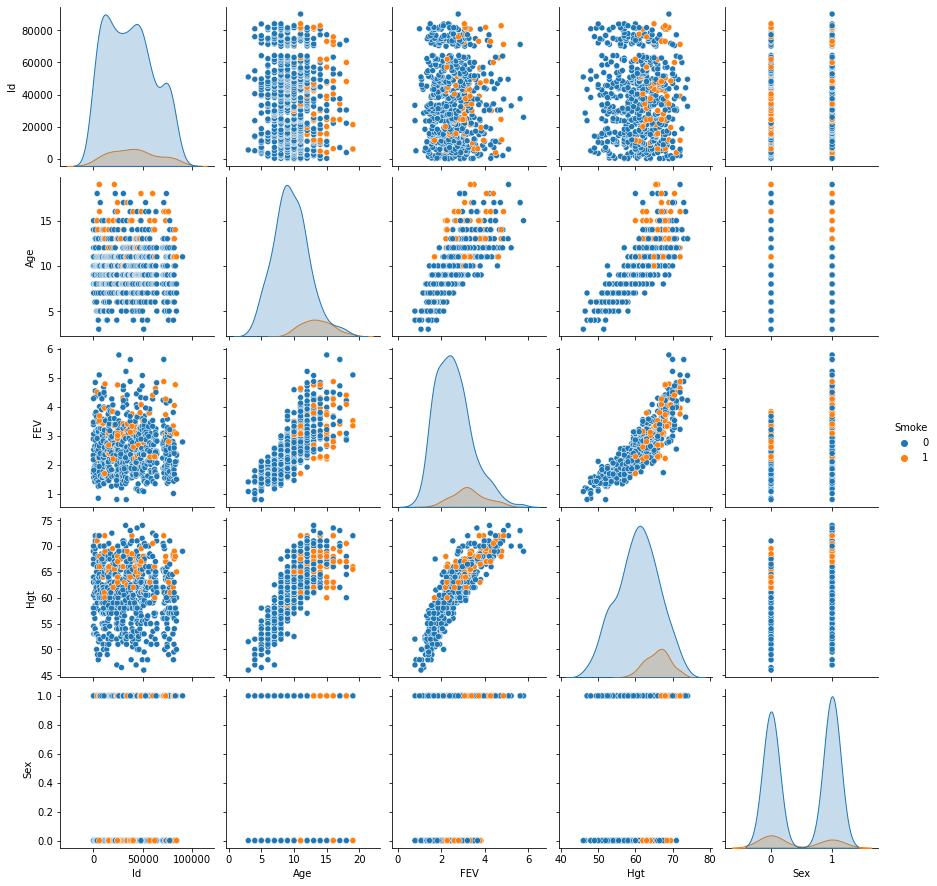

In [27]:
sns.pairplot(data, hue='Smoke')

In [29]:
X = data[['Age','Hgt']]
y = data['Smoke']

X= X.to_numpy()
y = y.to_numpy ()

In [35]:
colors = ['red' if label == 0 else 'blue' for label in y]

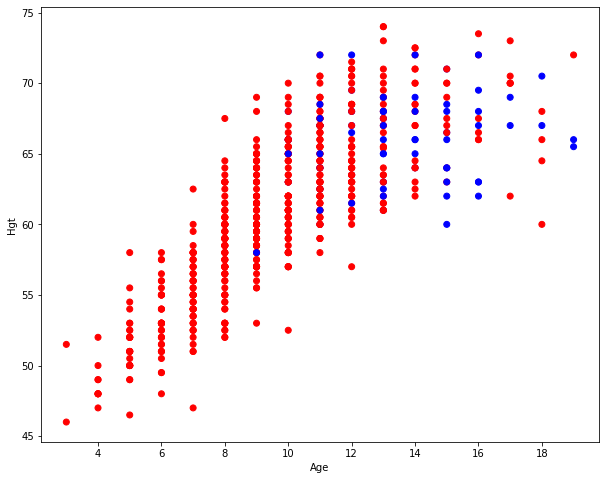

In [36]:
#visualizing 
plt.figure (figsize=(10,8))
plt.scatter (X[:,0], X[:,1], c= colors)
plt.xlabel ('Age')
plt.ylabel ('Hgt')
plt.show ()

In [41]:
from sklearn.model_selection import train_test_split
#Train-Test Split Data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

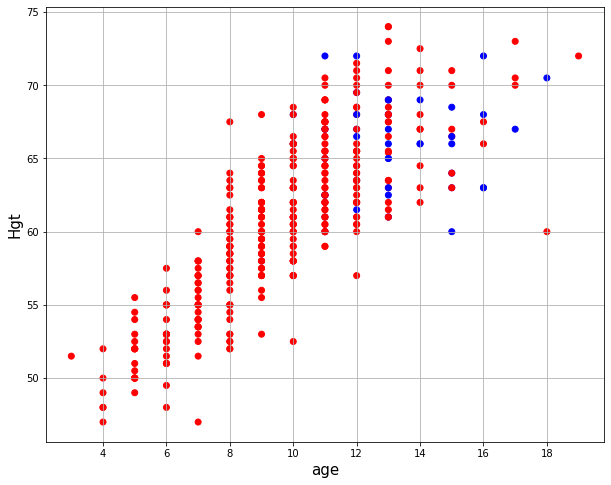

In [40]:
c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("age", fontsize = 15)
plt.ylabel("Hgt", fontsize = 15)
plt.grid()
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [44]:
decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

|--- x_0 <= 12.50
|   |--- x_1 <= 71.75
|   |   |--- x_0 <= 10.50
|   |   |   |--- x_1 <= 65.75
|   |   |   |   |--- x_0 <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  8.50
|   |   |   |   |   |--- x_1 <= 58.25
|   |   |   |   |   |   |--- x_1 <= 57.75
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- x_1 >  57.75
|   |   |   |   |   |   |   |--- x_0 <= 9.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- x_0 >  9.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- x_1 >  58.25
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- x_1 >  65.75
|   |   |   |   |--- x_0 <= 9.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- x_0 >  9.50
|   |   |   |   |   |--- x_1 <= 67.25
|   |   |   |   |   |   |--- x_1 <= 66.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- x_1 >  66.25
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- x_1 >  67.25
|   |   

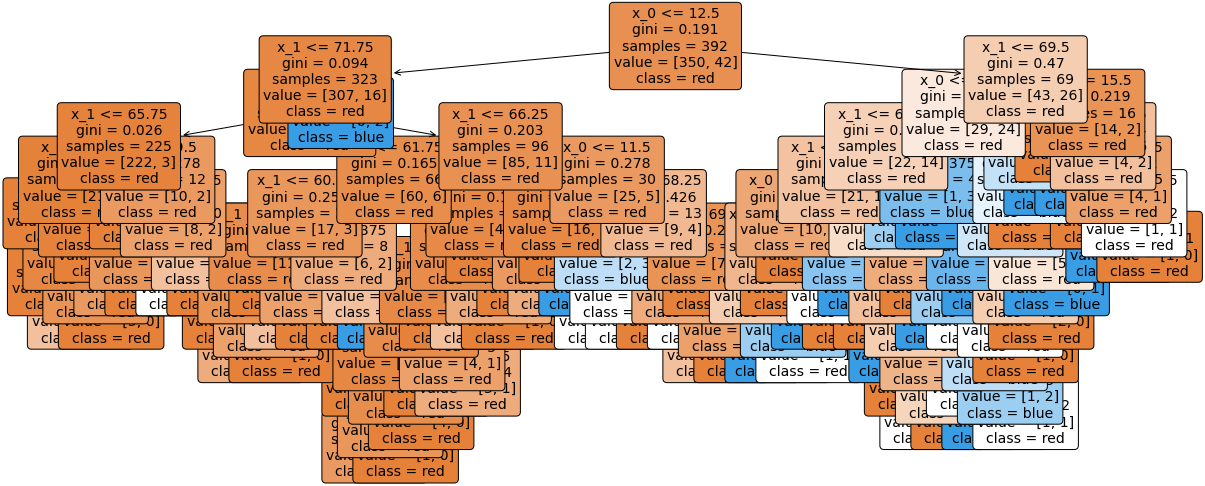

In [45]:
from sklearn.tree import plot_tree
from sklearn.tree import export_text

#visualizing 
tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

### Regression Trees

Decision trees can also be applied to regression problems, using the DecisionTreeRegressor class.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

# Data set
x = np.array(list(range(1, 11))).reshape(-1, 1)
y = np.array([4.50, 4.75, 4.91, 5.34, 5.80, 7.05, 7.90, 8.23, 8.70, 9.00]).ravel()

In [15]:
# Fit regression model
model1 = DecisionTreeRegressor(max_depth=1)
model2 = DecisionTreeRegressor(max_depth=3)
model3 = linear_model.LinearRegression()
model1.fit(x, y)
model2.fit(x, y)
model3.fit(x, y)

LinearRegression()

In [16]:
# Predict
X_test = np.arange(0.0, 10.0, 0.01)[:, np.newaxis]
y_1 = model1.predict(X_test)
y_2 = model2.predict(X_test)
y_3 = model3.predict(X_test)

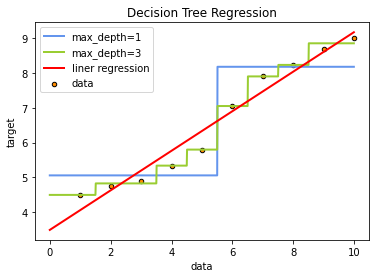

In [17]:
# Plot the results
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=1", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=3", linewidth=2)
plt.plot(X_test, y_3, color='red', label='liner regression', linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()